### Fine Tip Clearance Test Objective


### Procedure
- Ensure the drone is positioned on the tester rails such that the fishing line is slack
- Fix the current limit of the DC power supply connected in parallel with the lead acid battery to the same value for all tests. This should be a value between 2 and 8 amps, since the supply is fused at 10A
- Initiate sweep from 30-100% throttle in increments of 10%, holding each throttle for 10 seconds.
- At each throttle step, allow ~2s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Static Tip Clearance | Clearance to Height Ratio (%) |
|-                     |-                              |
| 1.0 mm               | 14.3 %                        |
| 0.9 mm               | 12.9 %                        |
| 0.8 mm               | 11.4 %                        |
| 0.7 mm               | 10.0 %                        |
| 0.6 mm               | 8.57 %                        |
| 0.5 mm               | 7.14 %                        |
| 0.4 mm               | 5.71 %                        |
| 0.3 mm               | 4.29 %                        |
| 0.2 mm               | 2.86 %                        |
| 0.1 mm               | 1.43 %                        |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.

In [298]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 30 to 100% throttle in increments of 10%, holding at each step for 10 seconds

In [299]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 10_000
step_range = np.arange(30, 101, 10)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])

In [300]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])


### Execute Tests

In [301]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = False

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [302]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

In [303]:
test_directory = Path("../test_data/fine_tip_clearance_revised/")

In [304]:
data_dict = {}
files = [
    "test_0.3mm_pb_0.csv",
    "test_0.4mm_pb_0.csv",
    "test_0.9mm_pb_0.csv",
    "test_1mm_pb_0.csv",
    # "test_0.4mm_pb_1.csv",
    "test_0.5mm_pb_0.csv",
    # "test_0.5mm_pb_1.csv",
    # "test_0.5mm_pb_2.csv",
    # "test_0.5mm_pb_3.csv",
    # "test_0.4mm_pb_2.csv",
    # "test_0.4mm_pb_3.csv",
    # "test_0.4mm_pb_4.csv",
    "test_0.4mm_pb_5.csv",
    "test_0.4mm_pb_6.csv",
]

for file in files:
    data_dict[file] = test_run(
        filename=test_directory / file, plan=plan
    )

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [305]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  bottom_motor_rpm  \
test_name           time_ms                                      
test_0.3mm_pb_0.csv 0.481                0.0               0.0   
                    5.162                0.0               0.0   
                    9.169                0.0               0.0   
                    13.157               0.0               0.0   
                    17.165               0.0               0.0   
...                                      ...               ...   
test_0.4mm_pb_5.csv 83041.161         3385.0            3385.0   
                    83045.157         3357.0            3357.0   
                    83049.165         3385.0            3428.0   
                    83053.157         3385.0            3400.0   
                    83057.161         3428.0            3428.0   

                               batt_voltage_V  batt_current_A  top_current_A  \
test_name           time_ms                                                    
test_0.3mm_pb_0.csv 0.481              15.204           10.24        0.20356   
                    5.162              14.385           10.24        0.05816   
                    9.169              14.112           10.24        0.24718   
                    13.157             14.028           10.24        0.20356   
                    17.165             14.028           10.24        0.24718   
...                                       ...             ...            ...   
test_0.4mm_pb_5.csv 83041.161          12.663           10.24        0.49436   
                    83045.157          12.621           10.24       -0.31988   
                    83049.165          12.621           10.24        0.45074   
                    83053.157          12.621           10.24        0.50890   
                    83057.161          12.621           10.24        0.39258   

                               bottom_current_A  thrust_N   torque_N  
test_name           time_ms                                           
test_0.3mm_pb_0.csv 0.481              -0.12519  0.508665   0.000000  
                    5.162              -0.20865  0.508665   0.000000  
                    9.169              -0.13910  0.508665 -11.152761  
                    13.157             -0.20865  0.508665  -0.000003  
                    17.165             -0.12519  0.508665   0.000000  
...                                         ...       ...        ...  
test_0.4mm_pb_5.csv 83041.161           0.08346  1.367503   0.000000  
                    83045.157          -0.11128  1.367503   0.000000  
                    83049.165           0.31993  1.367503  -5.554265  
                    83053.157          -0.11128  1.367503  -0.000003  
                    83057.161           0.26429  1.367503   0.000000  

[122230 rows x 8 columns]

In [306]:
# Generate buckets for averaging based on step duration defined in testing
transient_offset_ms = (
    2000  # Ignore first 500 ms of each throttle step to allow transients to settle
)
stable_step_duration_ms = step_duration_ms - transient_offset_ms
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm             bottom_motor_rpm  \
                                      mean         std             mean   
test_name           throttle                                              
test_0.3mm_pb_0.csv 30         6768.615000   48.676920       6639.91600   
                    40         8633.708253   89.058746       8365.93858   
                    50         9771.128500  116.843186       9491.74450   
                    60        11199.204635  303.260269      10836.83437   
                    70        12306.132000  104.911443      11921.80900   
                    80        13395.049500  106.171749      13015.03950   
                    90        14437.183500  335.539810      14008.06800   
                    100       15247.352000  489.379446      14914.95300   
test_0.4mm_pb_0.csv 30         6781.610000   46.187612       6636.05250   
                    40         8645.536000   90.470637       8364.07500   
                    50         9874.979500  111.821720       9510.97450   
                    60        11344.392500  114.221512      10887.17750   
                    70        12445.247000  108.485010      12028.47100   
                    80        13612.917000  323.017229      13132.25200   
                    90        14672.186000  472.316899      14127.12500   
                    100       15715.701000  116.215983      14945.23900   
test_0.4mm_pb_5.csv 30         6787.396500   47.049911       6639.01150   
                    40         8653.085500   89.767473       8359.04600   
                    50         9913.360000  249.391488       9592.11100   
                    60        11385.914000   95.259681      10956.65050   
                    70        12511.014500  109.954801      12086.50850   
                    80        13654.294000  117.099768      13179.30150   
                    90        14708.748500  473.383192      14169.14300   
                    100       15496.172500  351.683638      14980.65450   
test_0.5mm_pb_0.csv 30         6787.675500   46.803317       6651.70250   
                    40         8665.083500   91.352554       8378.58500   
                    50         9885.557000  118.175731       9601.08200   
                    60        11358.943500  107.693213      11012.01150   
                    70        12504.110000   95.097953      12122.75100   
                    80        13649.463500  324.722531      13250.50500   
                    90        14718.619000  473.968697      14301.48700   
                    100       15512.802500   90.139981      15161.61750   
test_0.9mm_pb_0.csv 30         6783.307000   46.462039       6653.37250   
                    40         8648.497500   89.033519       8422.21750   
                    50         9922.926000  112.316851       9580.20150   
                    60        11340.826000  374.276246      10979.33400   
                    70        12489.675500  100.990855      12139.51500   
                    80        13663.755500  442.774924      13221.59700   
                    90        14842.682000  343.764554      14239.93000   
                    100       15651.997000  144.211815      15170.03500   
test_1mm_pb_0.csv   30         6793.917000   47.143296       6633.02650   
                    40         8687.834000   86.174628       8356.91100   
                    50        10007.416500  120.406860       9560.63050   
                    60        11415.293000   93.679732      10936.29700   
                    70        12584.324500   99.521945      12065.93400   
                    80        13704.956500  445.619800      13150.36850   
                    90        14910.277000   81.279533      14131.94400   
                    100       15785.776500   66.496898      15152.45950   

                                         batt_voltage_V            \
                                     std           mean       std   
test_name           throttle                                     

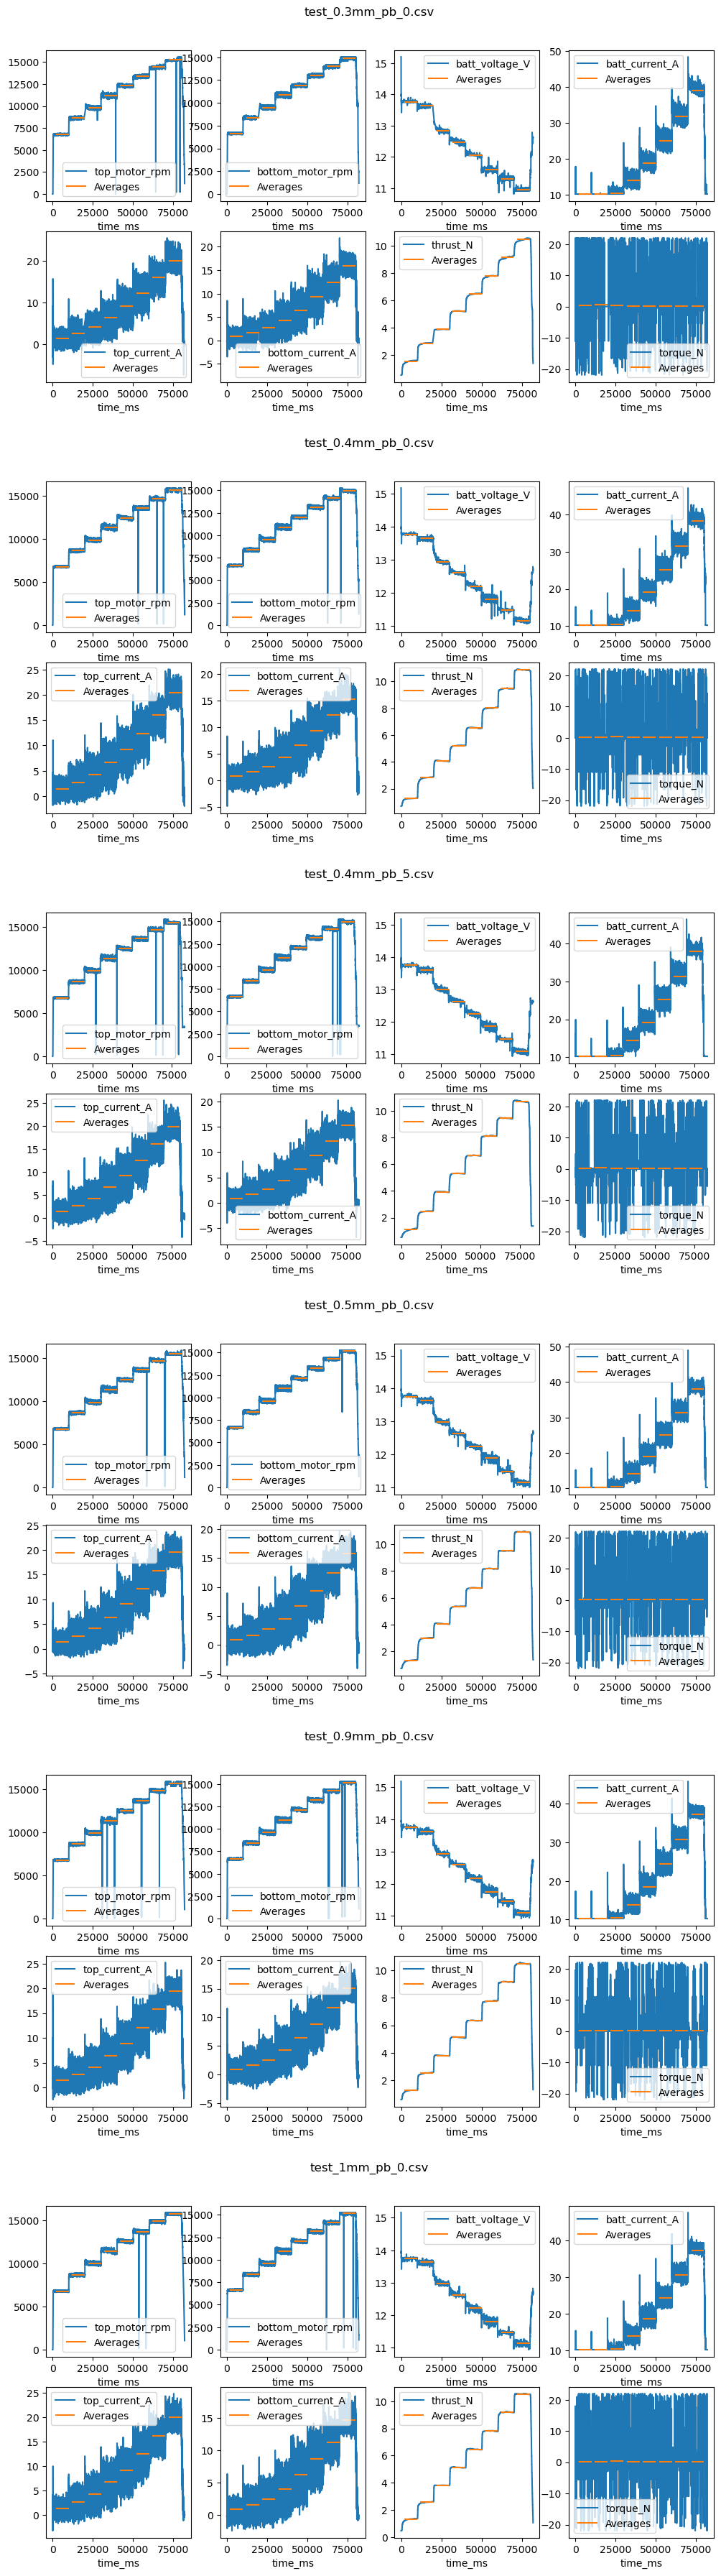

In [307]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [308]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = df_steps["thrust_N"]["std"] / 9.81 * 1e3

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = 0.025 / 14.8

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

rpm_avg = 0.5*(df_steps["top_motor_rpm"]["mean"] + df_steps["bottom_motor_rpm"]["mean"])

df_thrust_power = pd.DataFrame(
    {
        "rpm_avg": rpm_avg,
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "batt_voltage_mean": batt_voltage_mean,
        "hall_current_mean": hall_current_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": np.abs(batt_power_rel_err * batt_power_mean),
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

In [309]:
# Set nominal required thrust constants. Used as a benchmark to define region of interest for our data.
hover_thrust_g = 750
payload_thrust_g = 1200

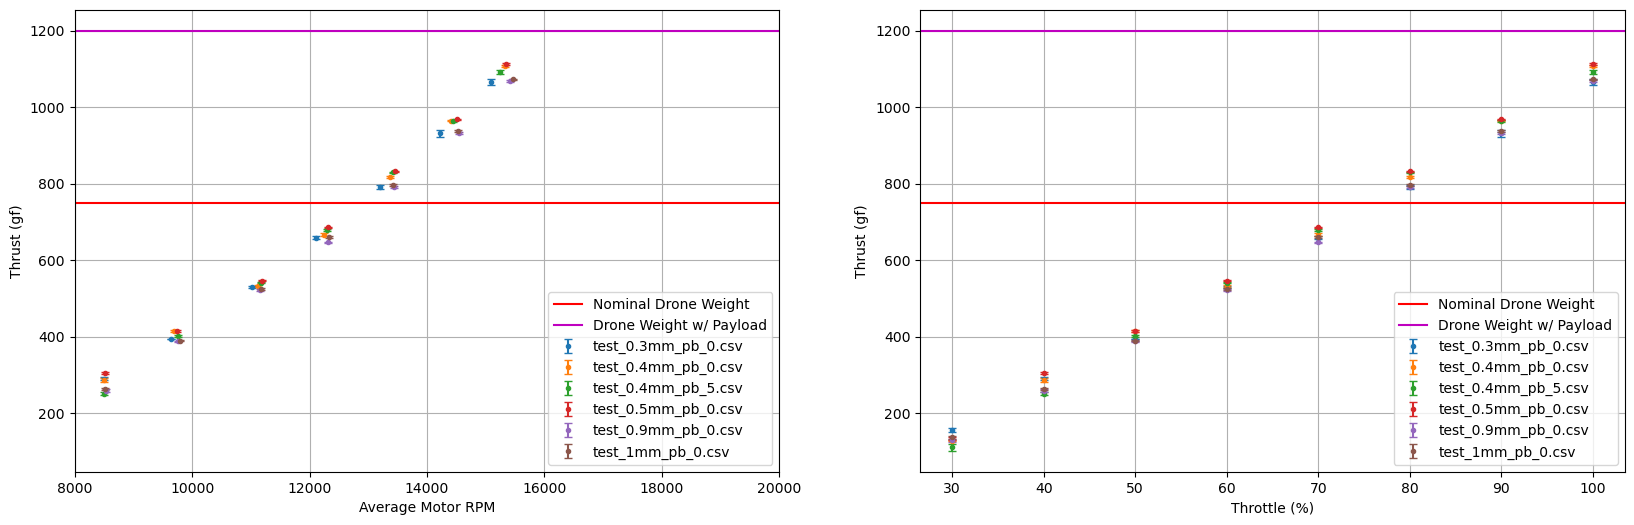

In [310]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    ax[0].errorbar(x="rpm_avg", y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
    ax[1].errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)

ax[0].set_xlabel("Average Motor RPM")
ax[0].set_ylabel("Thrust (gf)")
ax[0].set_xlim(8000, 20000)
ax[0].axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
ax[0].axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
ax[0].legend()
ax[0].grid()

ax[1].set_xlabel("Throttle (%)")
ax[1].set_ylabel("Thrust (gf)")
ax[1].axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
ax[1].axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
ax[1].legend()
ax[1].grid()

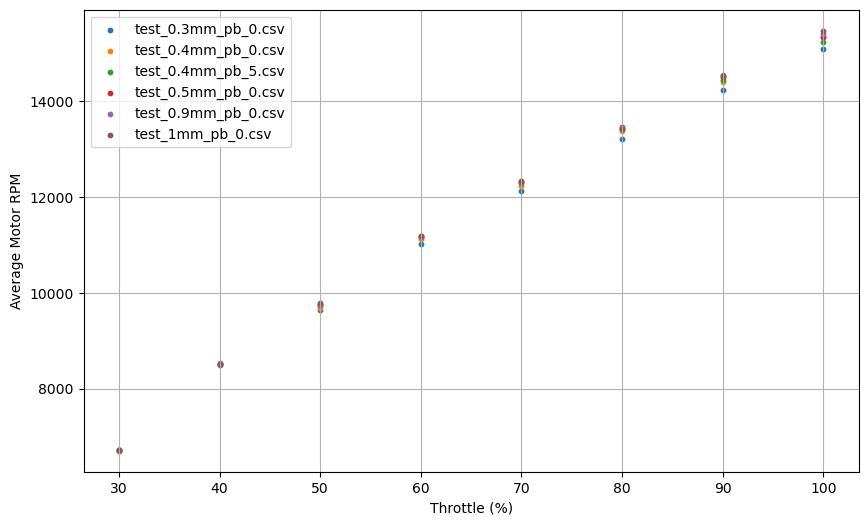

In [311]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x=grp.index.get_level_values("throttle"), y="rpm_avg", data=grp, label=n, s=10)
plt.xlabel("Throttle (%)")
plt.ylabel("Average Motor RPM")
plt.legend()
plt.grid()
plt.show()

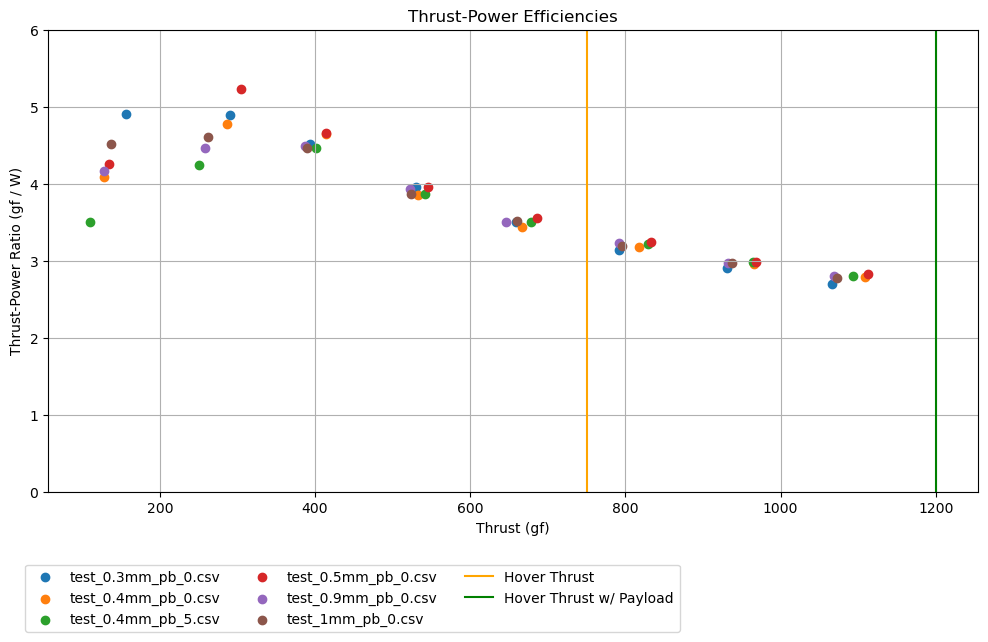

In [312]:
fig = plt.figure(figsize=(12, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
# plt.xlim(400, 1750)
plt.ylim(0,6)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

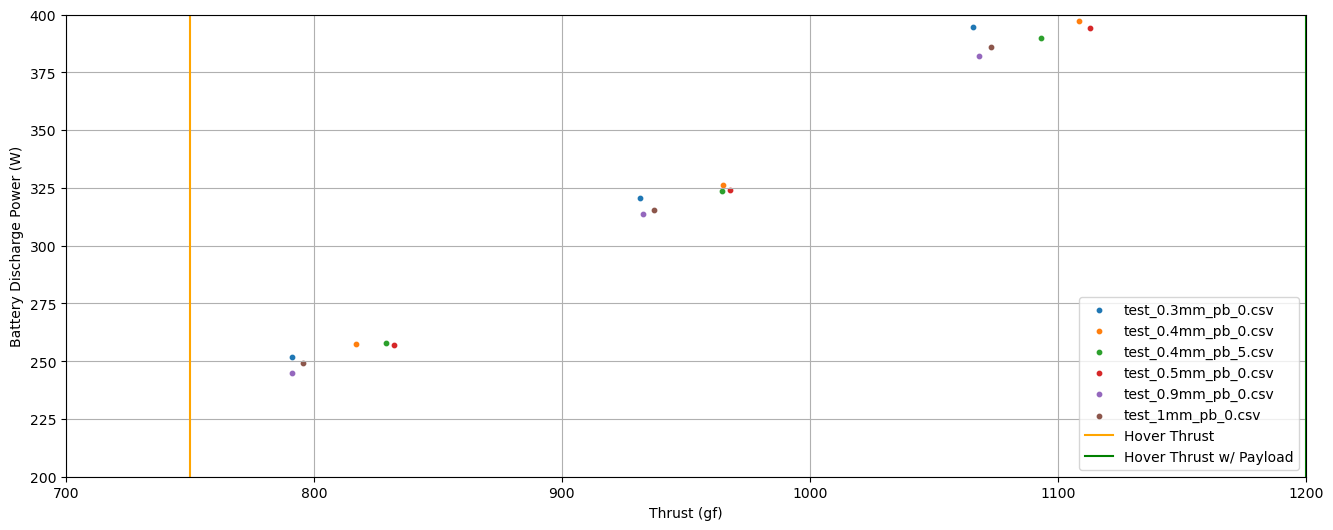

In [313]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=10)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
plt.xlim(700, 1200)
plt.ylim(200, 400)
plt.grid()
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

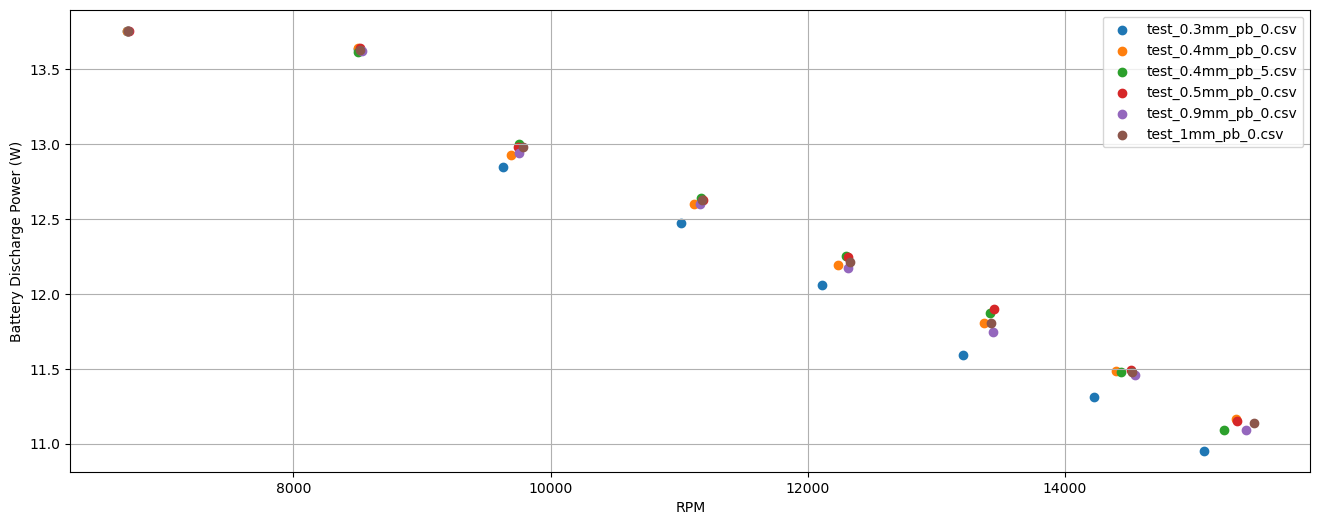

In [314]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="rpm_avg", y="batt_voltage_mean", label=n, data=grp)
plt.xlabel("RPM")
plt.ylabel("Battery Discharge Power (W)")
plt.grid()
plt.legend()
plt.show()